In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Business Intelligence(1641)/ASM/global air pollution dataset.csv')

In [11]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [12]:
df.tail()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate
23462,Malaysia,Marang,70,Moderate,1,Good,38,Good,0,Good,70,Moderate


In [23]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [24]:
#Checking data ranges and basic summary
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [15]:
qualitative_vars = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
qualitative_counts = df[qualitative_vars].apply(pd.Series.value_counts)
print("Qualitative Statistics:")
print(qualitative_counts)

Qualitative Statistics:
                                AQI Category  CO AQI Category  \
Good                                    9936          23460.0   
Hazardous                                191              NaN   
Moderate                                9231              2.0   
Unhealthy                               2227              NaN   
Unhealthy for Sensitive Groups          1591              1.0   
Very Unhealthy                           287              NaN   

                                Ozone AQI Category  NO2 AQI Category  \
Good                                       21069.0           23448.0   
Hazardous                                      NaN               NaN   
Moderate                                    1445.0              15.0   
Unhealthy                                    405.0               NaN   
Unhealthy for Sensitive Groups               491.0               NaN   
Very Unhealthy                                53.0               NaN   

               

In [25]:
# Checking for missing data
df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [20]:
#Number of unique countries
df['Country'].nunique()

175

In [27]:
#Number of unique cities
df['City'].nunique()

23462

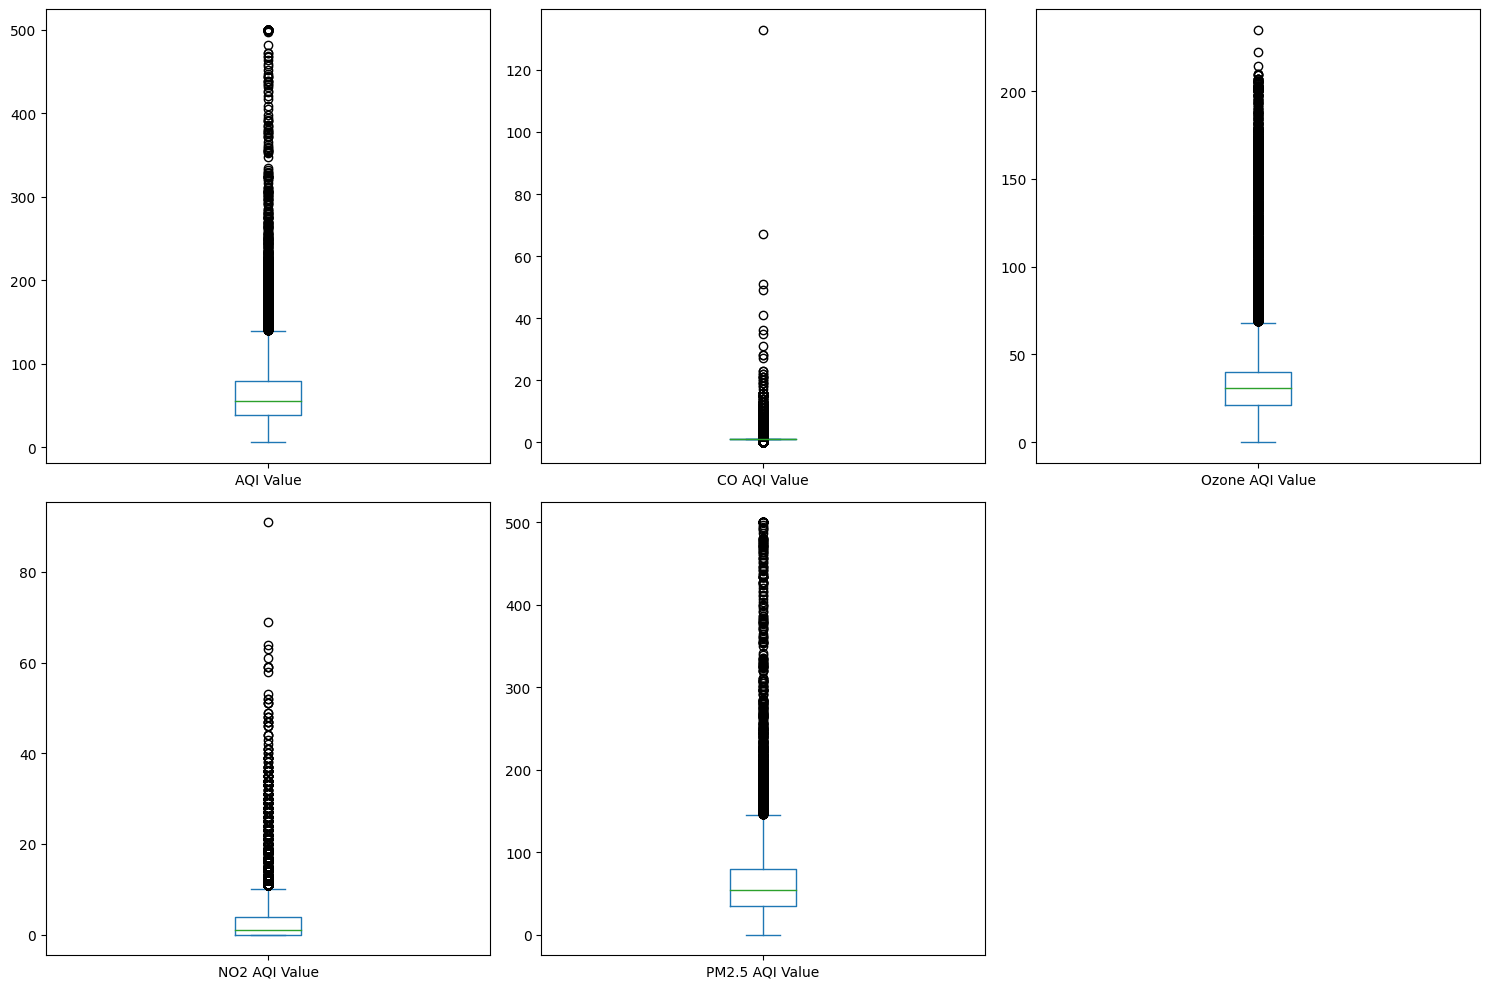

In [28]:
col = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

# Create a candlestick chart for each variable in the col . list
df[col].plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(15,10))
plt.tight_layout()
plt.show()

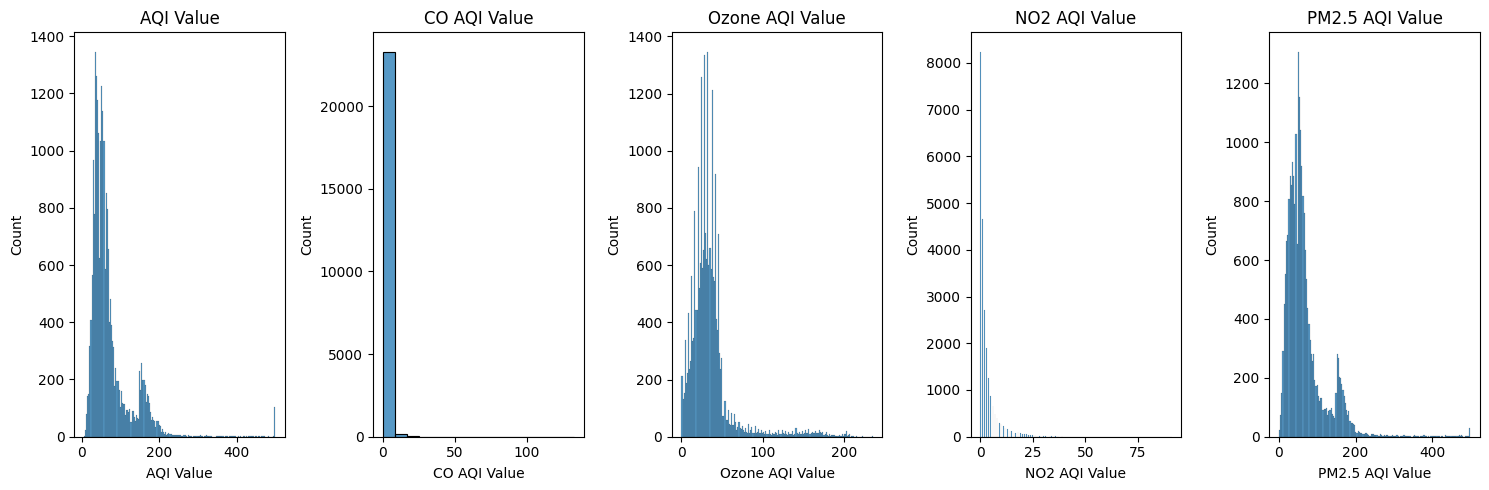

In [29]:
col = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
fig = plt.figure(figsize=(15, 5))

for i in range(len(col)):
    plt.subplot(1, 5, i+1)
    plt.title(col[i])
    sns.histplot(data=df, x=col[i])
plt.tight_layout()
plt.show()

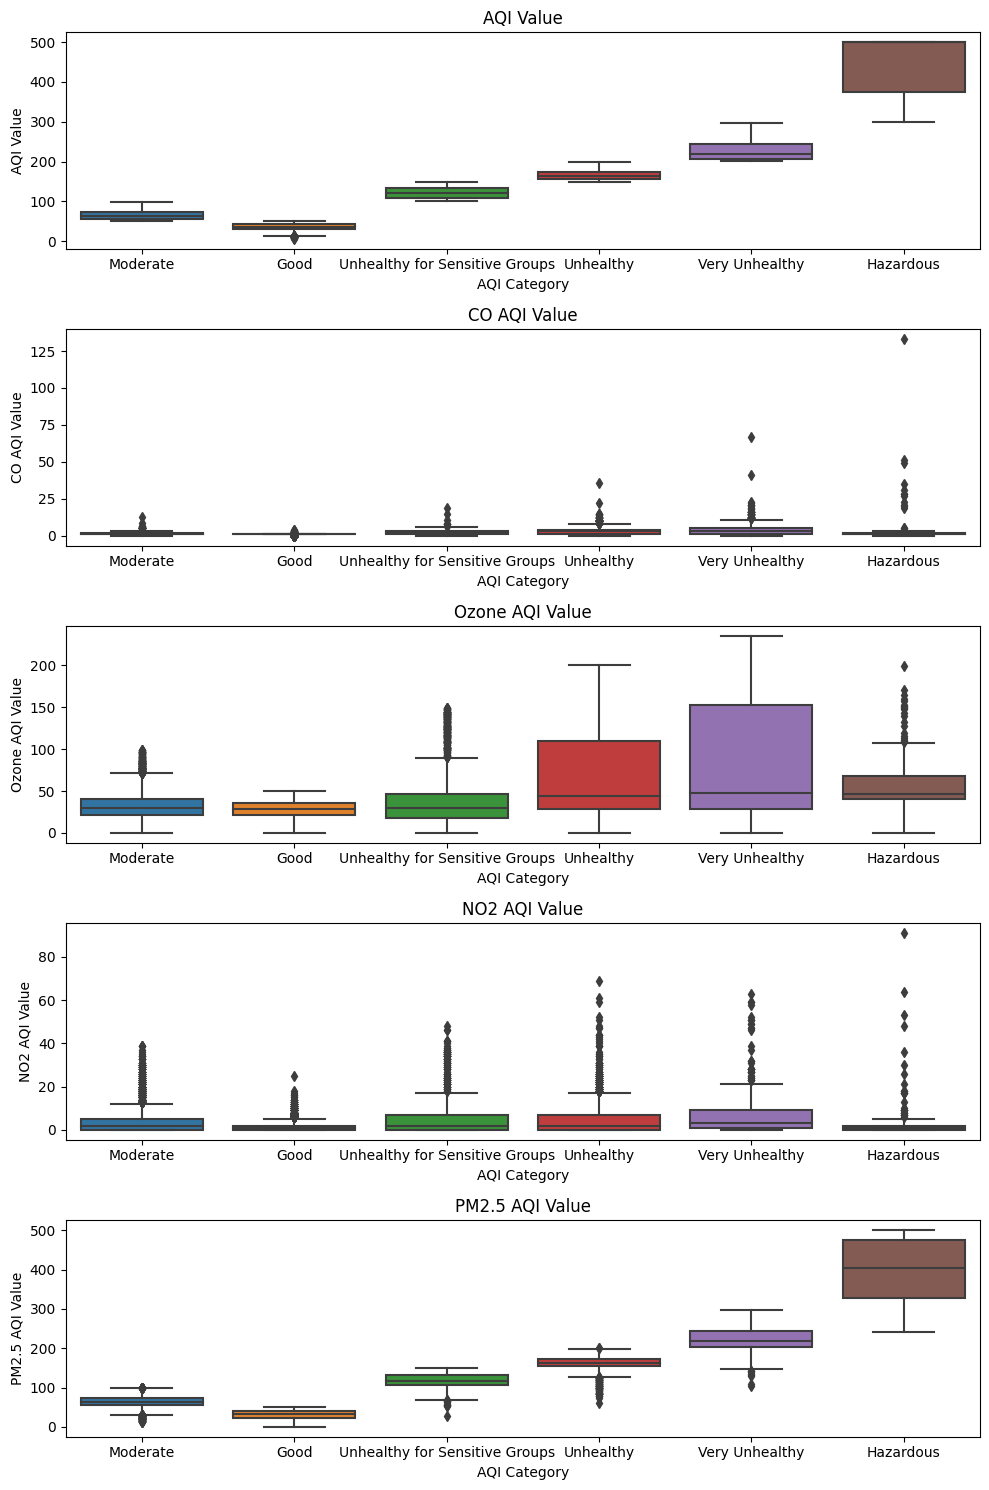

In [30]:
fig = plt.figure(figsize=(10,15))

for i in range(len(col)):
    plt.subplot(len(col), 1, i+1)
    sns.boxplot(data=df, y=df[col[i]], x=df['AQI Category'], orient='v')
    plt.title(col[i])
    plt.xlabel('AQI Category')
    plt.ylabel(col[i])
    plt.tight_layout()

plt.show()

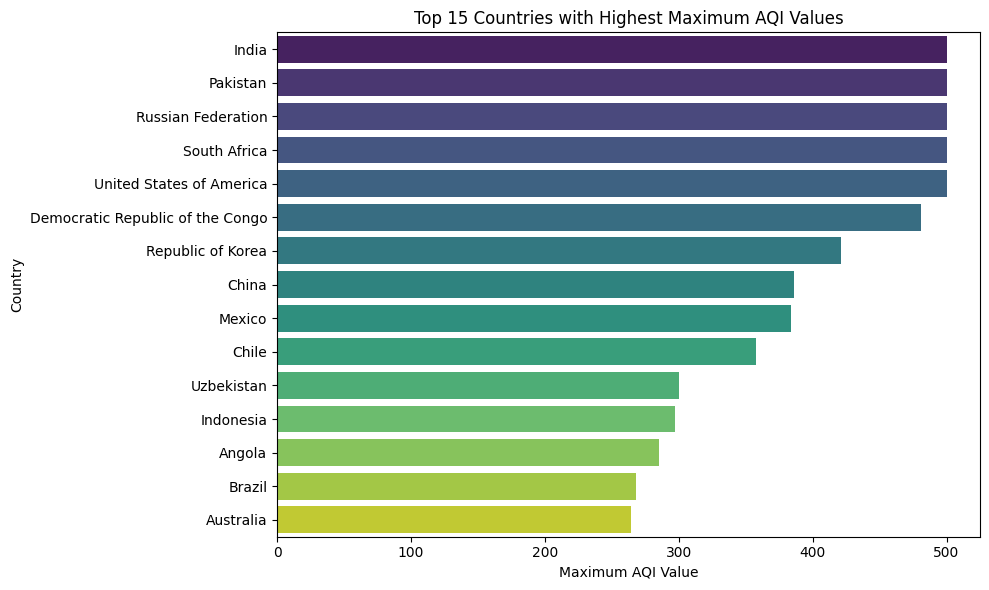

In [34]:
# Group by country and calculate the maximum AQI value for each country
top_countries = df.groupby('Country')['AQI Value'].max().nlargest(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis", orient='h')
plt.xlabel('Maximum AQI Value')
plt.ylabel('Country')
plt.title('Top 15 Countries with Highest Maximum AQI Values')
plt.tight_layout()
plt.show()

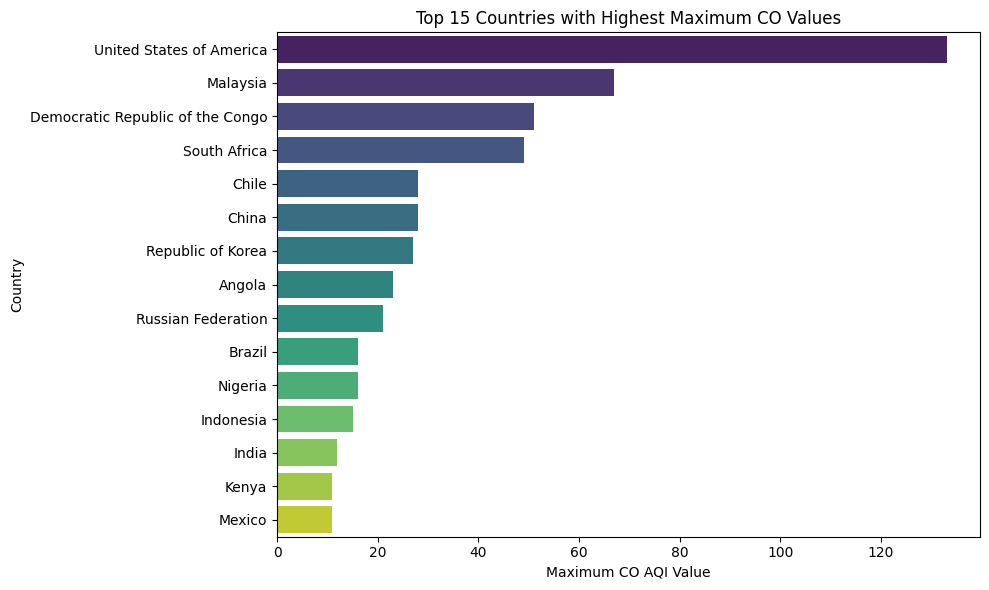

In [35]:
top_countries_co = df.groupby('Country')['CO AQI Value'].max().nlargest(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries_co.values, y=top_countries_co.index, palette="viridis")
plt.xlabel('Maximum CO AQI Value')
plt.ylabel('Country')
plt.title('Top 15 Countries with Highest Maximum CO Values')
plt.tight_layout()
plt.show()

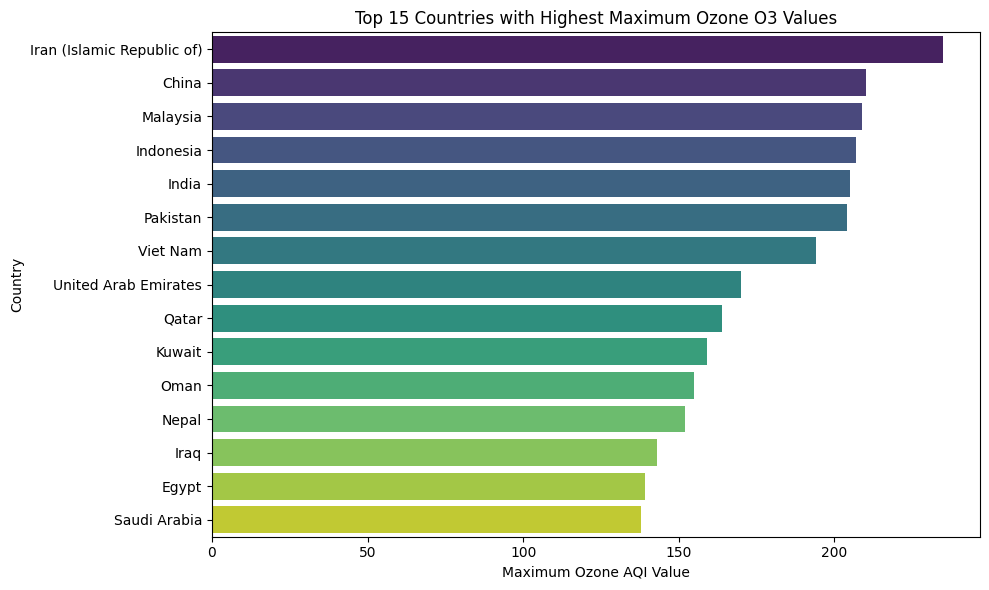

In [36]:
top_countries_o3 = df.groupby('Country')['Ozone AQI Value'].max().nlargest(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries_o3.values, y=top_countries_o3.index, palette="viridis")
plt.xlabel('Maximum Ozone AQI Value')
plt.ylabel('Country')
plt.title('Top 15 Countries with Highest Maximum Ozone O3 Values')
plt.tight_layout()
plt.show()

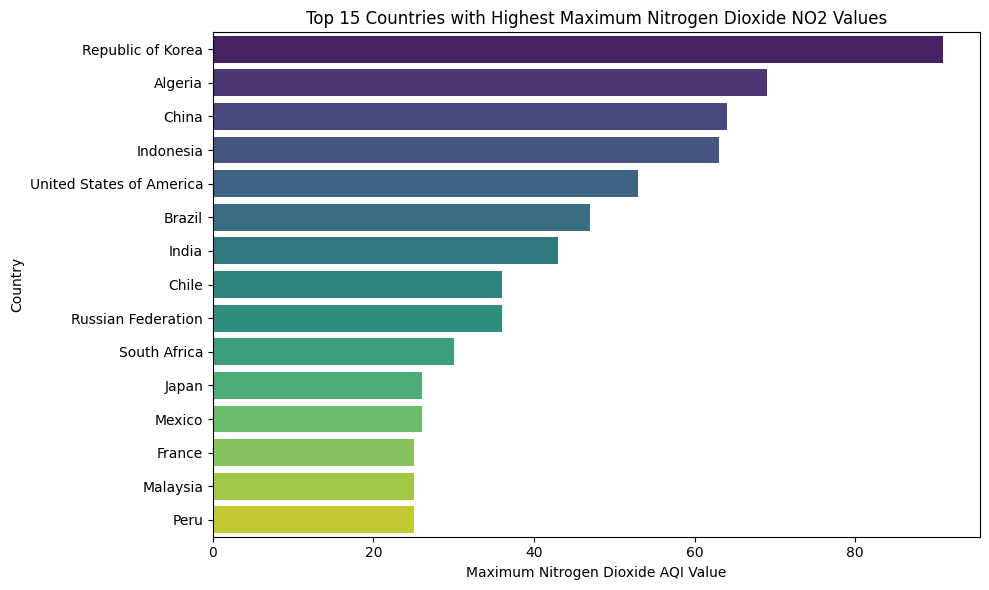

In [38]:
top_countries_no2 = df.groupby('Country')['NO2 AQI Value'].max().nlargest(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries_no2.values, y=top_countries_no2.index, palette="viridis")
plt.xlabel('Maximum Nitrogen Dioxide AQI Value')
plt.ylabel('Country')
plt.title('Top 15 Countries with Highest Maximum Nitrogen Dioxide NO2 Values')
plt.tight_layout()
plt.show()

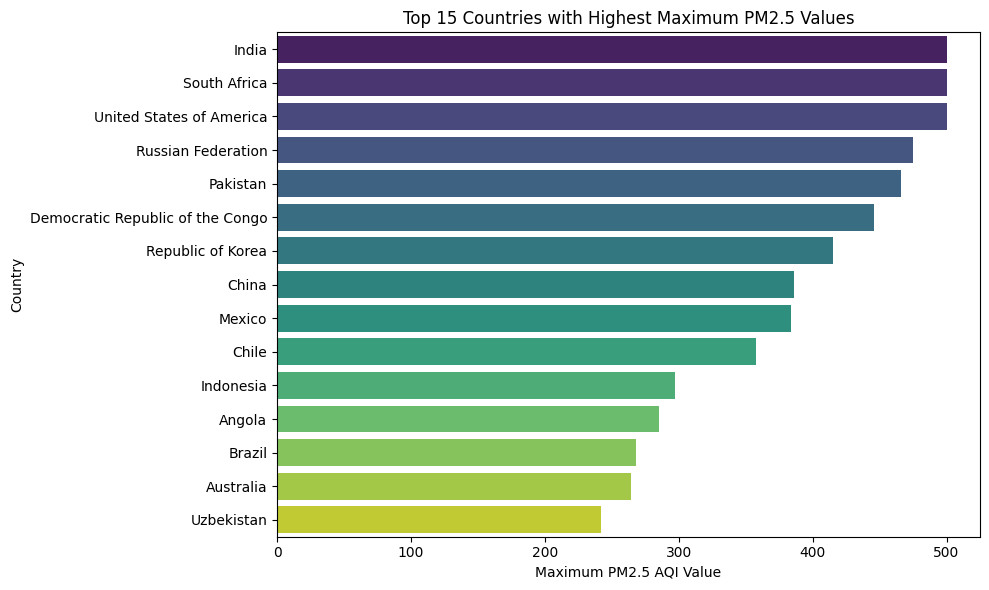

In [39]:
top_countries_pm25 = df.groupby('Country')['PM2.5 AQI Value'].max().nlargest(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries_pm25.values, y=top_countries_pm25.index, palette="viridis")
plt.xlabel('Maximum PM2.5 AQI Value')
plt.ylabel('Country')
plt.title('Top 15 Countries with Highest Maximum PM2.5 Values')
plt.tight_layout()
plt.show()

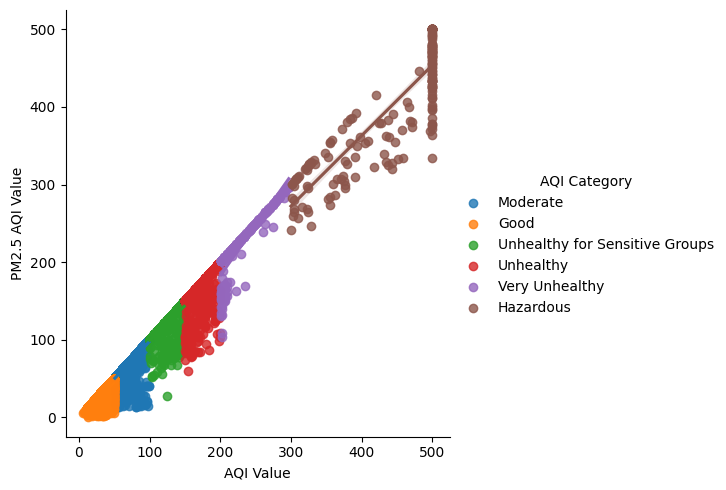

In [42]:
#Multivariate analysis
sns.lmplot(data=df,y='PM2.5 AQI Value',x='AQI Value',hue="AQI Category");

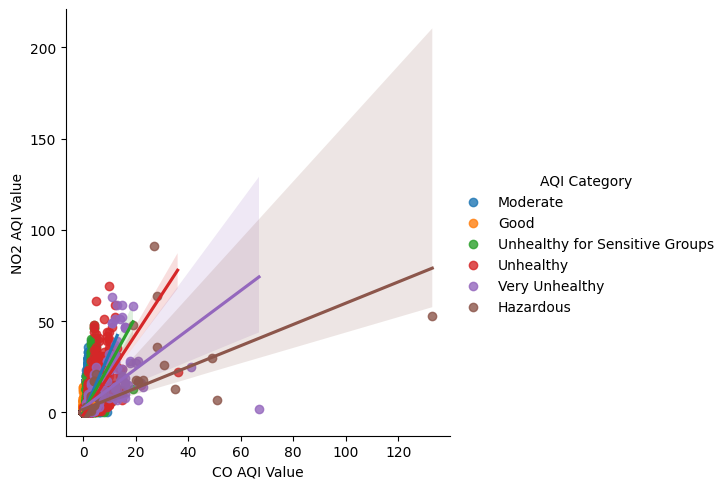

In [43]:
#Multivariate analysis
sns.lmplot(data=df,x='CO AQI Value',y='NO2 AQI Value',hue="AQI Category");